In [1]:
from utils import *
respondents, results, cardsE, cardsB = loadData()

# Result analysis - number of respondents

In [20]:
MAX_PARTICIPANTS = 40
MIN_PARTICIPANTS = 1
ITERATIONS = 20

In [23]:
ids = {}

for v in ['E50', 'E30', 'B50', 'B30']:
    ids[v] =  []
    for j in range(ITERATIONS):
        ids[v].append(respondents[respondents.variant==v].respondent.sample(40).values)

## Correlations and AMI againts full sample

In [4]:
corrsSAgaistFullParticipants = {}
corrsMAgaistFullParticipants = {}
corrsMAgainst50 = {}
corrsMAgainstEachOther = {}
amiAgaistFullParticipants = {}
amiAgainstEachOther = {}
amiAgainst50 = {}

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for v in ['E50', 'E30', 'B50', 'B30']:
        cards = cardsE if v in ['E30', 'E50'] else cardsB

        m2 = makeMatrix('similarity', results[results.variant==v], cards, 40)
        m3 = makeMatrix('similarity', results[results.variant==('E50' if v  in['E50', 'E30'] else 'B50')], cards, 40)

        corrsMAgaistFullParticipants[v] = {}
        corrsMAgainst50[v] = {}
        corrsSAgaistFullParticipants[v] = {}
        corrsMAgainstEachOther[v] = {}
        amiAgaistFullParticipants[v] = {}
        amiAgainstEachOther[v] = {}
        amiAgainst50[v] = {}
        
        for iter in range(ITERATIONS):
            print(v + '-' + str(iter), end=' ')
            corrsMAgaistFullParticipants[v][iter] = []
            corrsMAgainst50[v][iter] = []
            corrsSAgaistFullParticipants[v][iter] = []
            corrsMAgainstEachOther[v][iter] = []
            amiAgaistFullParticipants[v][iter] = []
            amiAgainstEachOther[v][iter] = []
            amiAgainst50[v][iter] = []
            for participants in range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1):
                m1 = makeMatrix('similarity', results[(results.variant==v) & (results.respondent.isin(ids[v][iter][:participants]))], cards, participants)
                res = mantel(np.matrix(m1), np.matrix(m2))
                corrsMAgaistFullParticipants[v][iter].append(float(res[0]))
                
                res = mantel(np.matrix(m1), np.matrix(m3))
                corrsMAgainst50[v][iter].append(float(res[0]))
                
                res = spearmanr(np.array(np.matrix(m1).flatten())[0], np.array(np.matrix(m2).flatten())[0])
                corrsSAgaistFullParticipants[v][iter].append(float(res[0]))
                
                m50 = makeMatrix('similarity', results[(results.variant==('E50' if v in ['E50', 'E30'] else 'B50')) & (results.respondent.isin(ids[('E50' if v in ['E50', 'E30'] else 'B50')][iter][:participants]))], cards, participants)
                res = mantel(np.matrix(m1), np.matrix(m50))
                corrsMAgainstEachOther[v][iter].append(float(res[0]))

                x = adjusted_mutual_info_score(getClustersKmeans(m2, 15)[1], getClustersKmeans(m1, 15)[1])
                amiAgaistFullParticipants[v][iter].append(float(x))

                x = adjusted_mutual_info_score(getClustersKmeans(m1, 15)[1], getClustersKmeans(m3, 15)[1])
                amiAgainst50[v][iter].append(float(x))

                x = adjusted_mutual_info_score(getClustersKmeans(m1, 15)[1], getClustersKmeans(m50, 15)[1])
                amiAgainstEachOther[v][iter].append(float(x))

E50-0 E50-1 E50-2 E50-3 E50-4 E50-5 E50-6 E50-7 E50-8 E50-9 E50-10 E50-11 E50-12 E50-13 E50-14 E50-15 E50-16 E50-17 E50-18 E50-19 E30-0 E30-1 E30-2 E30-3 E30-4 E30-5 E30-6 E30-7 E30-8 E30-9 E30-10 E30-11 E30-12 E30-13 E30-14 E30-15 E30-16 E30-17 E30-18 E30-19 B50-0 B50-1 B50-2 B50-3 B50-4 B50-5 B50-6 B50-7 B50-8 B50-9 B50-10 B50-11 B50-12 B50-13 B50-14 B50-15 B50-16 B50-17 B50-18 B50-19 B30-0 B30-1 B30-2 B30-3 B30-4 B30-5 B30-6 B30-7 B30-8 B30-9 B30-10 B30-11 B30-12 B30-13 B30-14 B30-15 B30-16 B30-17 B30-18 B30-19 

In [ ]:
allDiffs = []
for var in [corrsMAgaistFullParticipants, corrsMAgainst50, corrsMAgainstEachOther, amiAgaistFullParticipants, amiAgainstEachOther, amiAgainst50]:
    diffs = {'E50': [], 'E30': [], 'B50': [], 'B30': []}
    for v in ['E50', 'E30', 'B50', 'B30']:
        last = []
        for i in range(ITERATIONS):
            kept = {k: var[v][k] for k in range(i+1) if k in var[v]}
            current = np.mean(np.stack(list(kept.values())), axis=0)
            if(len(last) > 0):
                diffs[v].append((np.array(last) - current).mean())
            last = current
    allDiffs.append(diffs)

for i, v in enumerate(allDiffs):
    last = [float(np.round(values[-1], 4)) for key, values in v.items()]
    print(last, np.mean(last))

In [7]:
RcorrsMAgaistFullParticipants = {}
RcorrsMAgainst50 = {}
RcorrsSAgaistFullParticipants = {}
RcorrsMAgainstEachOther = {}
RamiAgaistFullParticipants = {}
RamiAgainstEachOther = {}
RamiAgainst50 = {}

In [8]:
for v in ['E50', 'E30', 'B50', 'B30']:
    RcorrsMAgaistFullParticipants[v] = np.mean(np.stack(list(corrsMAgaistFullParticipants[v].values())), axis=0)
    RcorrsMAgainst50[v] = np.mean(np.stack(list( corrsMAgainst50[v].values())), axis=0)
    RcorrsSAgaistFullParticipants[v] = np.mean(np.stack(list( corrsSAgaistFullParticipants[v].values())), axis=0)
    RcorrsMAgainstEachOther[v] = np.mean(np.stack(list(corrsMAgainstEachOther[v].values())), axis=0)
    RamiAgaistFullParticipants[v] = np.mean(np.stack(list(amiAgaistFullParticipants[v].values())), axis=0)
    RamiAgainstEachOther[v] = np.mean(np.stack(list(amiAgainstEachOther[v].values())), axis=0)
    RamiAgainst50[v] = np.mean(np.stack(list(amiAgainst50[v].values())), axis=0)

In [23]:
pd.DataFrame(RamiAgainstEachOther, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1)).to_clipboard()

<Axes: >

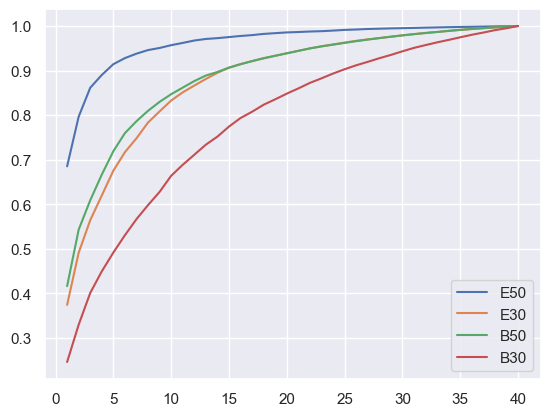

In [10]:
pd.DataFrame(RcorrsMAgaistFullParticipants, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1)).plot()

<Axes: >

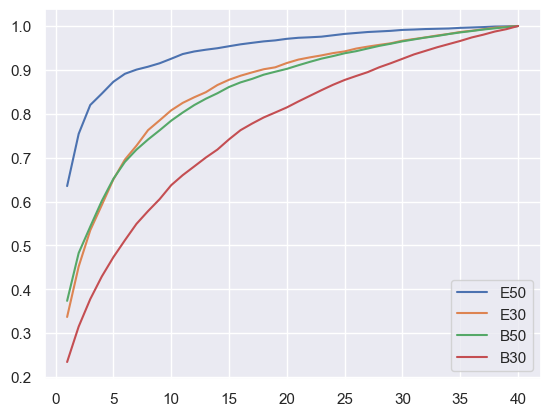

In [11]:
pd.DataFrame(RcorrsSAgaistFullParticipants, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1)).plot()

<Axes: >

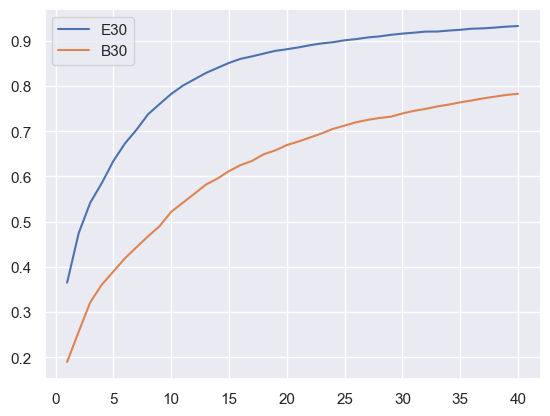

In [12]:
pd.DataFrame(RcorrsMAgainst50, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1))[['E30', 'B30']].plot()

<Axes: >

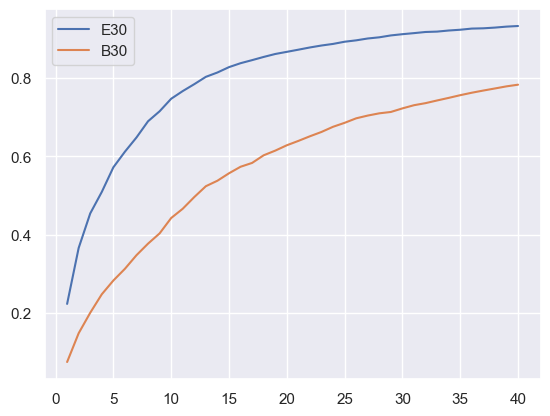

In [13]:
pd.DataFrame({k: RcorrsMAgainstEachOther[k] for k in ('E30', 'B30')}, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1)).plot()

<Axes: >

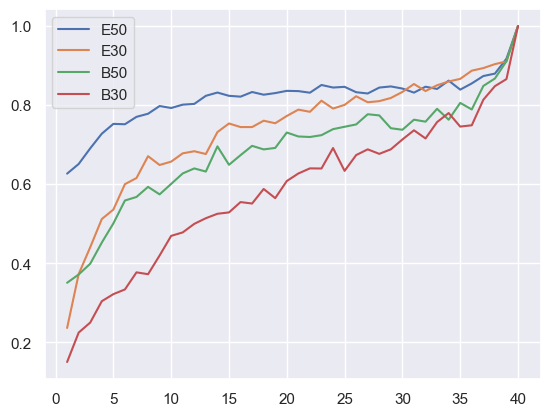

In [14]:
pd.DataFrame(RamiAgaistFullParticipants, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1)).plot()

<Axes: >

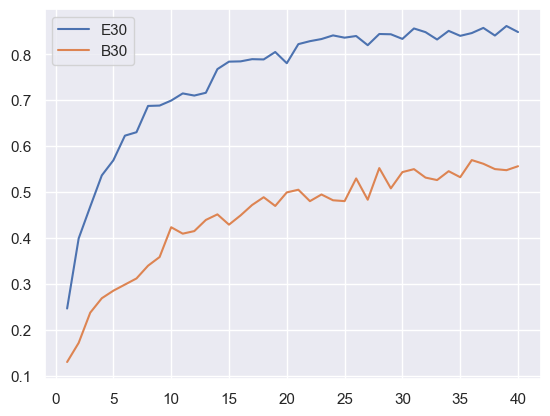

In [15]:
pd.DataFrame(RamiAgainst50, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1))[['E30', 'B30']].plot()

<Axes: >

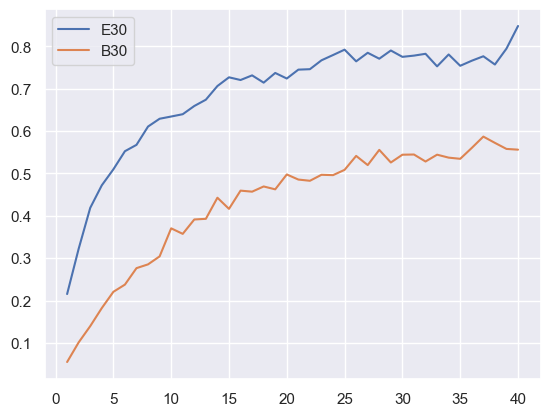

In [16]:
pd.DataFrame({k: RamiAgainstEachOther[k] for k in ('E30', 'B30')}, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1)).plot()

## Hierarchical clustering approach

In [168]:
def BMMClusters(data, cards):
    mapping = {}
    for cluster_index, cluster in enumerate(data):
        for s in cluster:
            mapping[s] = cluster_index
    return [mapping.get(s, -1) for s in cards]

amiBMMAgaistFullParticipants = {}

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for v in ['E50', 'E30', 'B50', 'B30']:
        cards = cardsE if v in ['E30', 'E50'] else cardsB
        x1, x1H = makeMatrix('C-similarity', results[results.variant==v], cards, 40, clusterHistory=True)
        agg1 = [x['agreement'] for x in x1H]
        max=20
        knee1 = KneeLocator(range(1, max+1), agg1[-max:][::-1], curve='concave', direction='increasing').elbow
        amiBMMAgaistFullParticipants[v] = {}

        for iter in range(ITERATIONS):
            print(v + '-' + str(iter), end=' ')
            amiBMMAgaistFullParticipants[v][iter] = []

            for participants in range(MIN_PARTICIPANTS + 10, MAX_PARTICIPANTS+1):
                    x2, x2H = makeMatrix('C-similarity', results[(results.variant==v) & (results.respondent.isin(ids[v][i][:participants]))], cards, participants, clusterHistory=True)
                    agg2 = [x['agreement'] for x in x2H]
                    knee2 = KneeLocator(range(1, max+1), agg2[-max:][::-1], curve='concave', direction='increasing').elbow
                    score = adjusted_mutual_info_score(BMMClusters(x1H[-knee1]['clusters'], cards), BMMClusters(x2H[-knee2]['clusters'], cards))
                    amiBMMAgaistFullParticipants[v][iter].append(float(score))
            

E50-0 E50-1 E50-2 E50-3 E50-4 E50-5 E50-6 E50-7 E50-8 E50-9 E50-10 E50-11 E50-12 E50-13 E50-14 E50-15 E50-16 E50-17 E50-18 E50-19 E30-0 E30-1 E30-2 E30-3 E30-4 E30-5 E30-6 E30-7 E30-8 E30-9 E30-10 E30-11 E30-12 E30-13 E30-14 E30-15 E30-16 E30-17 E30-18 E30-19 B50-0 B50-1 B50-2 B50-3 B50-4 B50-5 B50-6 B50-7 B50-8 B50-9 B50-10 B50-11 B50-12 B50-13 B50-14 B50-15 B50-16 B50-17 B50-18 B50-19 B30-0 B30-1 B30-2 B30-3 B30-4 B30-5 B30-6 B30-7 B30-8 B30-9 B30-10 B30-11 B30-12 B30-13 B30-14 B30-15 B30-16 B30-17 B30-18 B30-19 

In [171]:
RamiBMMAgaistFullParticipants = {}

for v in ['E50', 'E30', 'B50', 'B30']:
    RamiBMMAgaistFullParticipants[v] = np.mean(np.stack(list(amiBMMAgaistFullParticipants[v].values())), axis=0)

<Axes: >

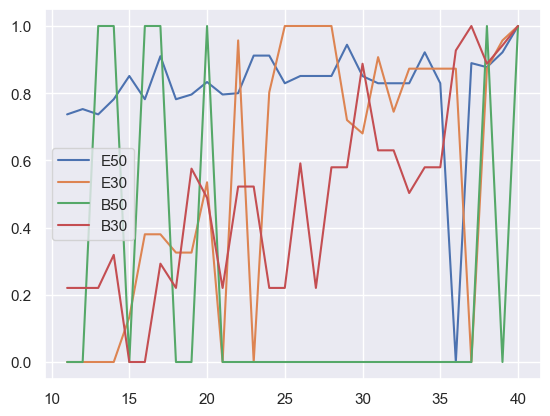

In [174]:
pd.DataFrame(RamiBMMAgaistFullParticipants, index=range(MIN_PARTICIPANTS+10, MAX_PARTICIPANTS+1)).plot()

## Kappa scores

In [ ]:
groupings = {}
for v in ['E50', 'E30', 'B50', 'B30']:
    cards = cardsE if v in ['E30', 'E50'] else cardsB
    groupings[v] = {}

    for iter in range(ITERATIONS):
        groupings[v][iter] = {}
        for participants in range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1):
            groupings[v][iter][participants] = {}
            for categories in range(2, 13):
                _, hist = makeMatrix('C-similarity', results[(results.variant==v) & (results.respondent.isin(ids[v][iter][:participants]))], cards, participants, clusterHistory=True)
                res = [-1 for x in range(50)]
                for i, group in enumerate(hist[-categories]['clusters']):
                    group = list(map(lambda x: {x[1]: x[0] for x in enumerate(cards)}[x], group))
                    for j in group:
                        res[j] = i
                groupings[v][iter][participants][categories] = res

In [ ]:
cappas = {}
for v in ['E50', 'E30', 'B50', 'B30']:
    cappas[v] = {}
    for iter in range(ITERATIONS):
        cappas[v][iter] = [0 for _ in range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+2)]
        #part = len(results.groupby(['variant']).get_group((v,)).respondent.unique())
        for participants in range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1):
            #if(participants <= part):
            for categories in range(2, 13):
                cappas[v][iter][participants] += float(
                    cohen_kappa_score(groupings[v][iter][participants][categories], 
                                        groupings['E50' if v in ['E50', 'E30'] else 'B50'][iter][40][categories])
                )
        cappas[v][iter] = [x / 11 for x in cappas[v][iter]][1:]

In [ ]:
for v in ['E50', 'E30', 'B50', 'B30']:
    cappas[v] = np.mean(np.stack(list(cappas[v].values())), axis=0)

<Axes: >

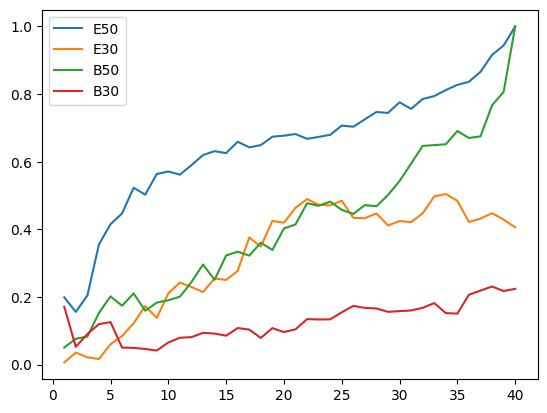

In [ ]:
cappasDF = pd.DataFrame(cappas, index=range(MIN_PARTICIPANTS, MAX_PARTICIPANTS+1))
cappasDF.rolling(1).mean().plot()

In [149]:
sims = {}

for v in ['E50', 'E30', 'B50', 'B30']:
    cards = cardsE if v in ['E50', 'E30'] else cardsB
    mainSim = makeMatrix('similarity', results[results.variant==v], cards, 40)
    mainOrder = BMM(mainSim)[0][0]
    sims[v] = {}
    for p in range(1, 41):
        simSum = np.zeros((50, 50))
        for i in range(ITERATIONS):
            simSum += np.matrix(makeMatrix('similarity', results[(results.variant==v) & (results.respondent.isin(ids[v][i][:p]))], cards, p))
        sims[v][p] = simSum / (i+1)
        #bmmOrder = BMM()[0][0]
        sims[v][p] = np.asarray(sims[v][p])[np.ix_(mainOrder, mainOrder)]
        sims[v][p] = pd.DataFrame(sims[v][p], index=cards[mainOrder], columns=cards[mainOrder])


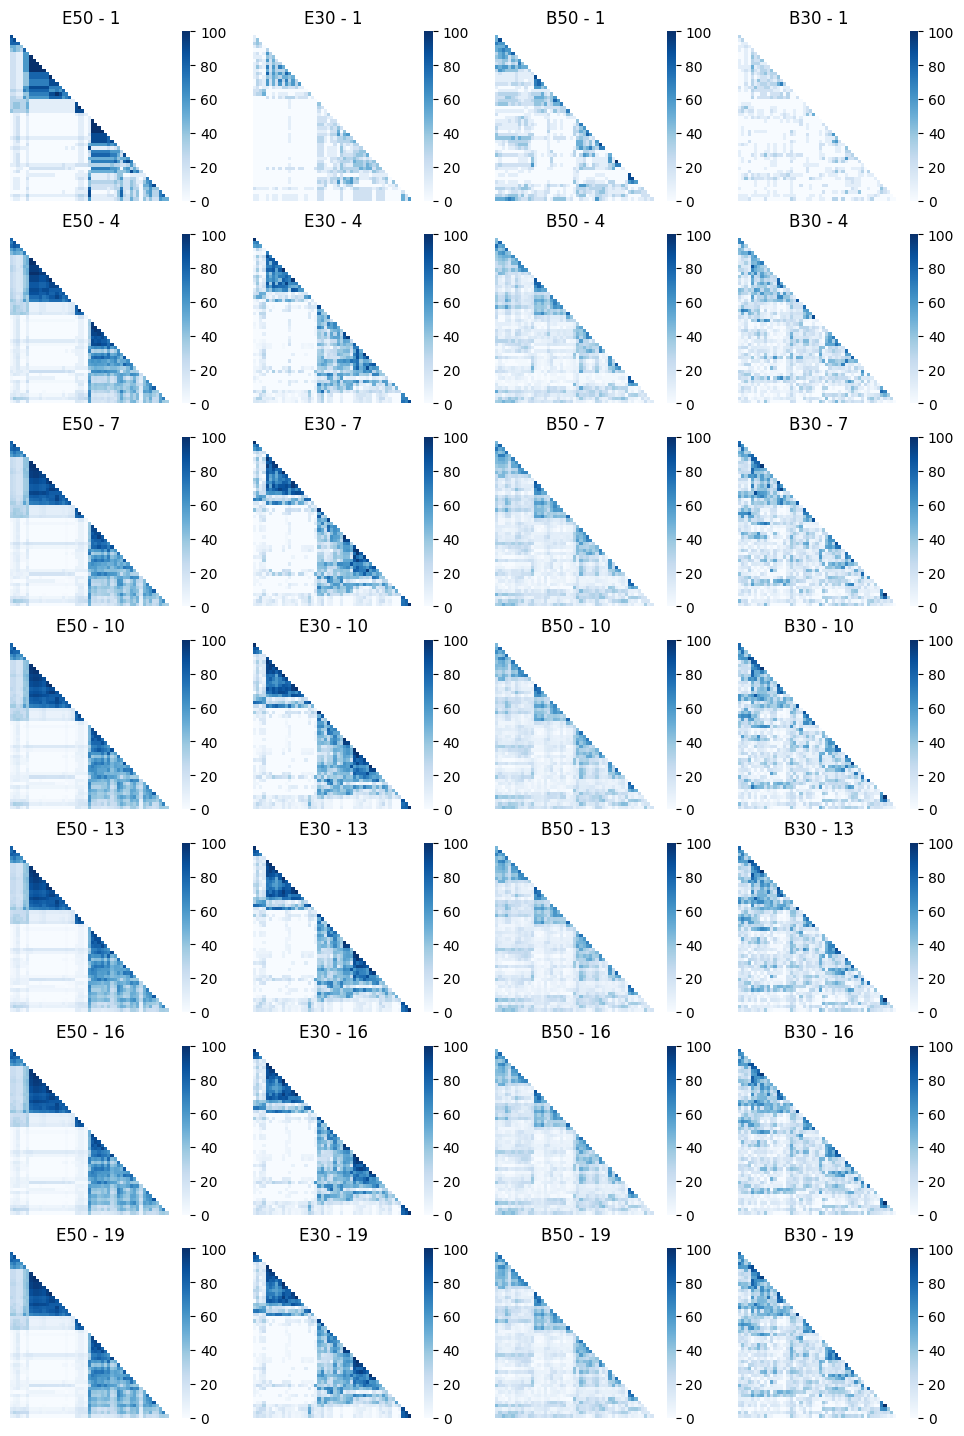

In [151]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(12, 18))

for col, v in enumerate(['E50', 'E30', 'B50', 'B30']):
    for row, i in enumerate(range(1, 21, 3)):
        matrix = sims[v][i]
        sns.heatmap(matrix, mask=np.triu(np.ones_like(matrix, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=axes[row, col])
        axes[row, col].set_title(v + ' - ' + str(i))

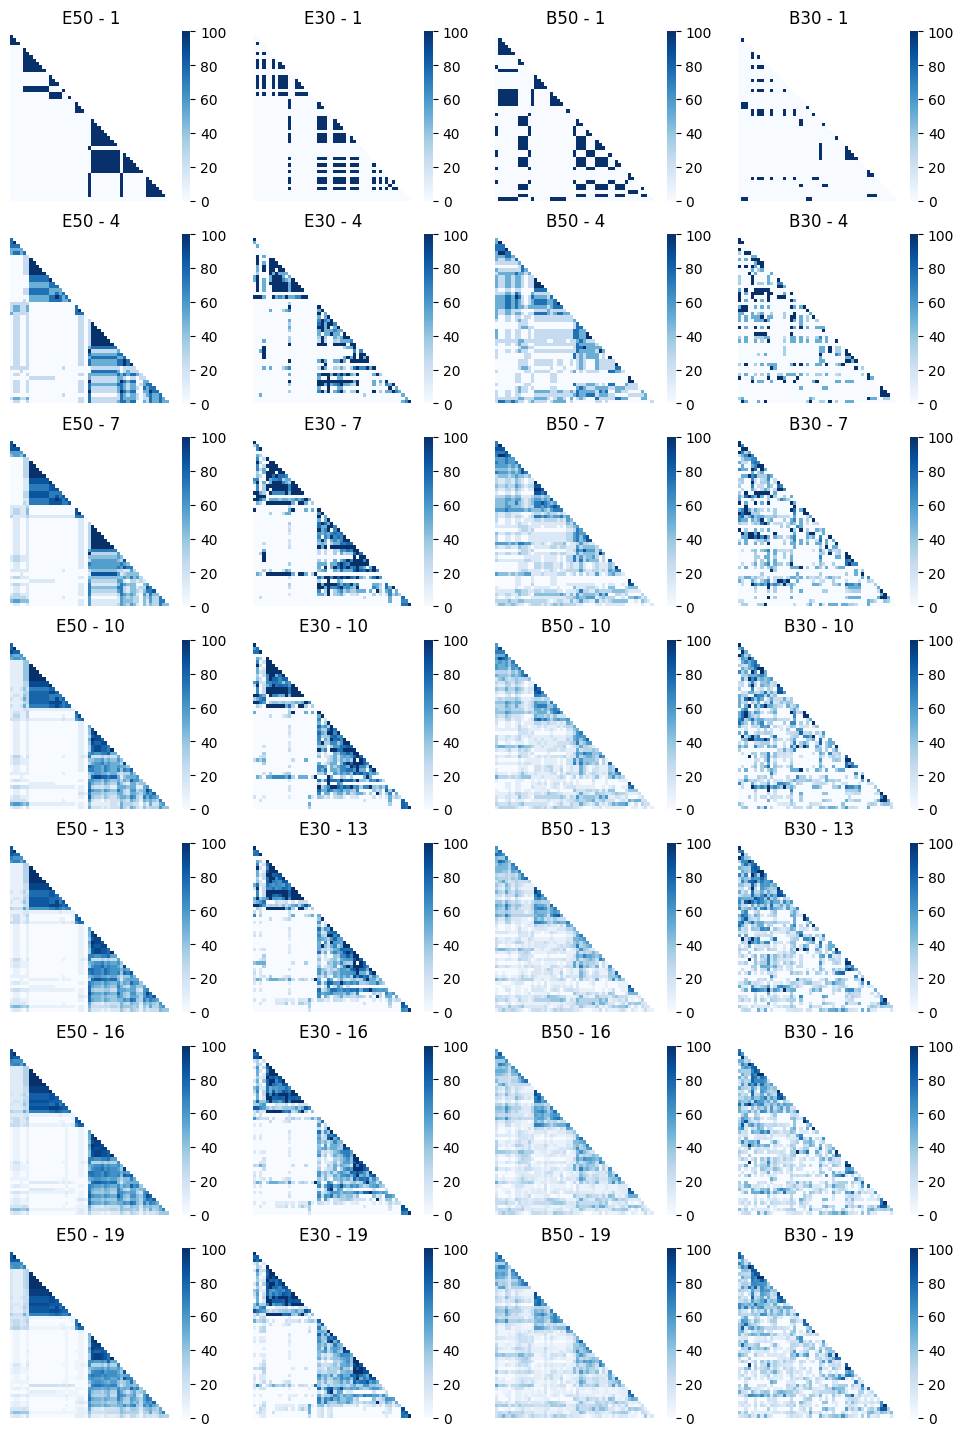

In [152]:
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(12, 18))

for col, v in enumerate(['E50', 'E30', 'B50', 'B30']):
    cards = cardsE if v in ['E50', 'E30'] else cardsB
    mainSim = makeMatrix('similarity', results[results.variant==v], cards, 40)
    mainOrder = BMM(mainSim)[0][0]
    for row, i in enumerate(range(1, 21, 3)):
        matrix = makeMatrix('C-similarity', results[(results.variant==v) & (results.respondent.isin(ids[v][0][:i]))], cards, i, clusteredOrder=cards[mainOrder])
        sns.heatmap(matrix, mask=np.triu(np.ones_like(matrix, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], ax=axes[row, col])
        axes[row, col].set_title(v + ' - ' + str(i))

## Correlation trend prediction

In [4]:
x = [x + 1 for x in range(40)]

y = [0.1895792021, 0.2565943874, 0.3216273256, 0.3607503675, 0.3896632665, 0.4190272463, 0.4435786213, 0.4676319435, 0.4901384868, 0.5218198616, 0.5416884561, 0.5616348068, 0.5819695207, 0.5954030782, 0.6117855675, 0.6251362695, 0.6344966682, 0.6490680564, 0.6576807383, 0.6694147289, 0.6772770132, 0.6861553629, 0.6950943934, 0.7053089859, 0.7124175109, 0.7199347447, 0.7252177793, 0.7293110652, 0.7322630619, 0.7393321738, 0.7451593275, 0.7494703953, 0.7548279176, 0.7590520327, 0.7639321453, 0.7681957745, 0.7727632362, 0.7766186201, 0.7804029442, 0.7828678248]

In [38]:
from scipy.special import erf, gamma, gammainc, betainc
from sklearn.metrics import r2_score

def normal_cdf(x, mu, sigma):
    return 0.5 * (1 + erf((x - mu) / (sigma * np.sqrt(2))))

def exponential_cdf(x, lam):
    return 1 - np.exp(-lam * x)

def weibull_cdf(x, lam, k):
    return 1 - np.exp(-(x / lam) ** k)

def logistic_cdf(x, mu, s):
    return 1 / (1 + np.exp(-(x - mu) / s))

def gompertz_cdf(x, b, c):
    return 1 - np.exp(-b * (np.exp(c * x) - 1))

def gamma_cdf(x, k, theta):
    return gammainc(k, x / theta) / gamma(k)

def beta_cdf(x, alpha, beta_param):
    return betainc(alpha, beta_param, x)

def rayleigh_cdf(x, sigma):
    return 1 - np.exp(np.power(-x, 2) / (2 * np.power(sigma,2)))

def lognormal_cdf(x, mu, sigma):
    return 0.5 * (1 + erf((np.log(x) - mu) / (sigma * np.sqrt(2))))

def pareto_cdf(x, xm, alpha):
    return 1 - (xm / x)**alpha

distributions = {
    "Normal":   normal_cdf,
    "Exponential": exponential_cdf,
    "Weibull":  weibull_cdf,
    "Logistic": logistic_cdf,
    "Gompertz": gompertz_cdf,
    "Gamma":    gamma_cdf,
    "Beta":     beta_cdf,
    "Rayleigh": rayleigh_cdf,
    "LogNormal": lognormal_cdf,
    "Pareto":   pareto_cdf,
}

for name, func in distributions.items():
    try:
        params, _ = curve_fit(func, np.array(x[10:]), np.array(y[10:]), maxfev=100000)
        y_pred = func(np.array(x), *params)
        r2 = r2_score(y, y_pred)
        print(f"{name}: params={params}, R²={r2:.4f}")
    except Exception as e:
        print(f"{name}: fit failed ({e})")

Normal: params=[1. 1.], R²=-5.1752
Exponential: params=[0.0510535], R²=0.6475
Weibull: params=[16.81198045  0.51174331], R²=0.9934
Logistic: params=[ 2.91052614 26.43075911], R²=0.7401
Gompertz: params=[1. 1.], R²=-5.7364
Gamma: params=[ 0.73584116 14.39035746], R²=0.9790
Beta: fit failed (Input contains NaN.)
Rayleigh: fit failed (Input contains infinity or a value too large for dtype('float64').)
LogNormal: params=[2.17084978 1.91165701], R²=0.9923
Pareto: params=[2.91424703 0.57838704], R²=-0.5509


/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_34086/2121468569.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(func, np.array(x[10:]), np.array(y[10:]), maxfev=100000)
/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_34086/2121468569.py:8: RuntimeWarning: overflow encountered in exp
  return 1 - np.exp(-lam * x)
/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_34086/2121468569.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(func, np.array(x[10:]), np.array(y[10:]), maxfev=100000)
/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_34086/2121468569.py:49: OptimizeWarning: Covariance of the parameters could not be estimated
  params, _ = curve_fit(func, np.array(x[10:]), np.array(y[10:]), maxfev=100000)
/var/folders/3m/cjzjfzb55vz43fmr0ny8vj6w0000gn/T/ipykernel_34086/2121468569.py:26: RuntimeWarning: overflow encountered in exp
  return 1 - np.ex

In [39]:
def weibull(x, a, b):
    return 1 - np.exp(-a * x**b)

params, _ = curve_fit(weibull, x[10:], y[10:], maxfev=100000)

def equation(x):
    return weibull(x, *params)

In [ ]:
r2 = r2_score(y, equation(x))
r2

0.9933900457088073

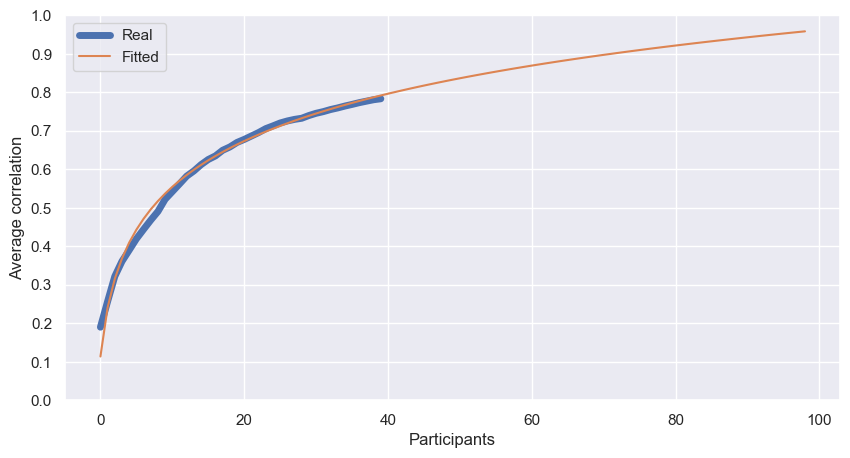

In [15]:
plt.figure(figsize=(10, 5))
plt.plot(np.array(y), linewidth=5, label='Real')
plt.plot(equation([x for x in range(1, 100)]), label='Fitted')
plt.ylim(0, 1)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('Participants')
plt.ylabel('Average correlation')
plt.legend()
plt.show()

In [119]:
pd.DataFrame(np.concatenate((np.array(y), equation([x for x in range(41, 100)]))), index=[x for x in range(1, 100)]).iloc[82]

0    0.896064
Name: 83, dtype: float64

## Average correaltions after splitting

In [ ]:
splits = {}

for v in ['E50', 'E30', 'B50', 'B30']:
    splits[v] = []
    for _ in range(ITERATIONS):
        sample = respondents[respondents.variant==v].respondent.sample(26).values
        splits[v].append((sample[:13], sample[13:]))

In [ ]:
corrs = {}
corrStd = {}

for v in ['E50', 'E30', 'B50', 'B30']:
    cards = cardsE if v in ['E30', 'E50'] else cardsB
    participants = 13
    corrs[v] = []

    for iter in range(ITERATIONS):
            
        matrix1 = makeMatrix('similarity', results[(results.variant==v) & (results.respondent.isin(splits[v][iter][0]))], cards, participants)
        matrix2 = makeMatrix('similarity', results[(results.variant==v) & (results.respondent.isin(splits[v][iter][1]))], cards, participants)
        res = mantel(np.matrix(matrix1), np.matrix(matrix2))
        corrs[v].append(res[0])

    corrStd[v] = np.std(corrs[v])
    corrs[v] = np.mean(corrs[v])

In [51]:
corrs

{'E50': np.float64(0.9131752538279096),
 'E30': np.float64(0.687039909673907),
 'B50': np.float64(0.6809833945081994),
 'B30': np.float64(0.3469218690224173)}

In [50]:
corrStd

{'E50': np.float64(0.017656928842427644),
 'E30': np.float64(0.029176653900985467),
 'B50': np.float64(0.03174539644496704),
 'B30': np.float64(0.03357395012636017)}

Text(0.5, 1.0, 'Subset-B, high CRT')

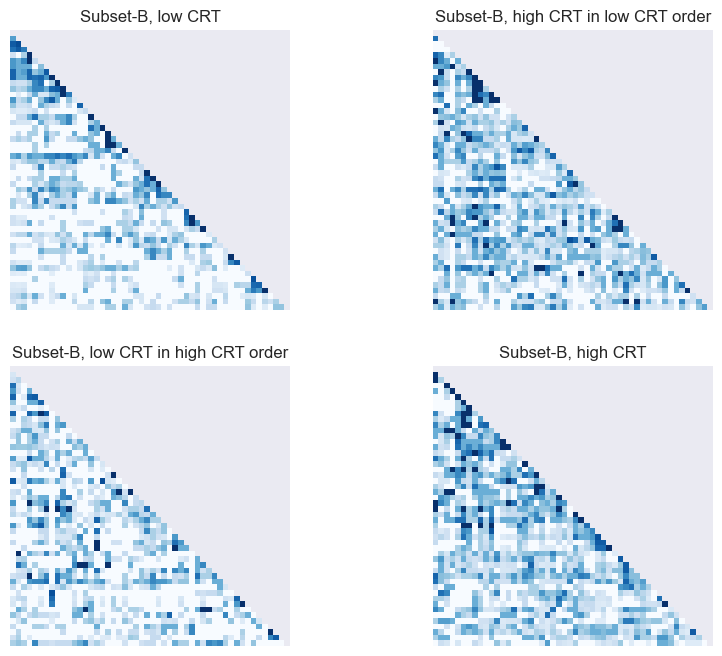

In [4]:
variant = 'B30'
data = respondents[respondents.variant == variant].sort_values('crt')
i1 = data.iloc[:13].respondent.values
i3 = data.iloc[27:].respondent.values

g1 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i1))].respondent.values
g3 = respondents[(respondents.variant == variant) & (respondents.respondent.isin(i3))].respondent.values

m1 = makeMatrix('C-similarity', results[(results.respondent.isin(g1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40)
m2 = makeMatrix('C-similarity', results[(results.respondent.isin(g3)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40, clusteredOrder=m1.index.values)
m4 = makeMatrix('C-similarity', results[(results.respondent.isin(g3)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40)
m3 = makeMatrix('C-similarity', results[(results.respondent.isin(g1)) & (results.variant==variant)], cardsE if variant in ['E50', 'E30'] else cardsB, 40, clusteredOrder=m4.index.values)

fig, axes = plt.subplots(2, 2, figsize=(10, 8))
ax = axes.ravel()
sns.heatmap(m1, mask=np.triu(np.ones_like(m1, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], cbar=False, square=True, ax=ax[0])
sns.heatmap(m2, mask=np.triu(np.ones_like(m2, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], cbar=False, square=True, ax=ax[1])
sns.heatmap(m3, mask=np.triu(np.ones_like(m3, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], cbar=False, square=True, ax=ax[2])
sns.heatmap(m4, mask=np.triu(np.ones_like(m4, dtype=bool)), vmin=0, vmax=100, cmap='Blues', xticklabels=[], yticklabels=[], cbar=False, square=True, ax=ax[3])

ax[0].set_title('Subset-B, low CRT')
ax[1].set_title('Subset-B, high CRT in low CRT order')
ax[2].set_title('Subset-B, low CRT in high CRT order')
ax[3].set_title('Subset-B, high CRT')